In [48]:
import pandas as pd
df=pd.read_csv('/content/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [49]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [50]:
cond=df['Sales']>6
cond1=df['Sales']<6
df.loc[cond,'Sales']=1
df.loc[cond1,'Sales']=0
df['Sales'].nunique()

2

In [51]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.675000,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,0.468961,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,0.000000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,1.000000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,1.000000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,1.000000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<ipython-input-52-9c30c310381e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


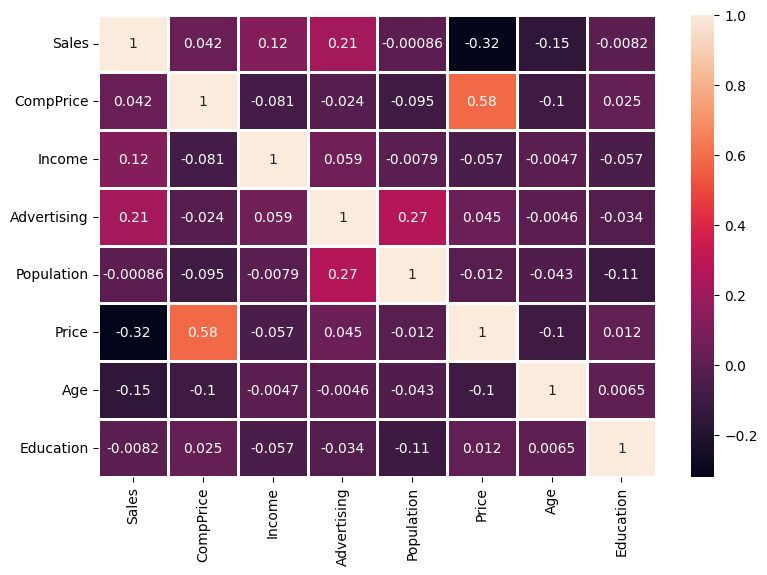

In [52]:
#Feature selection
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (9, 6))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [53]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['ShelveLoc']=le.fit_transform(df['ShelveLoc'])
df['Urban']=le.fit_transform(df['Urban'])
df['US']=le.fit_transform(df['US'])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,0,42,17,1,1
1,1.0,111,48,16,260,83,1,65,10,1,1
2,1.0,113,35,10,269,80,2,59,12,1,1
3,1.0,117,100,4,466,97,2,55,14,1,1
4,0.0,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,1,33,14,1,1
396,1.0,139,23,3,37,120,2,55,11,0,1
397,1.0,162,26,12,368,159,2,40,18,1,1
398,0.0,100,79,7,284,95,0,50,12,1,1


In [55]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [56]:
from sklearn.model_selection import train_test_split
x=df[['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']]
y=df['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 10)
(100, 10)
(300,)
(100,)


In [57]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred=dtc.predict(x_test)
y_pred

array([1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0.])

In [59]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8

 clasification report:
               precision    recall  f1-score   support

         0.0       0.61      0.73      0.67        30
         1.0       0.88      0.80      0.84        70

    accuracy                           0.78       100
   macro avg       0.74      0.77      0.75       100
weighted avg       0.80      0.78      0.79       100


 confussion matrix:
 [[22  8]
 [14 56]]


In [60]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

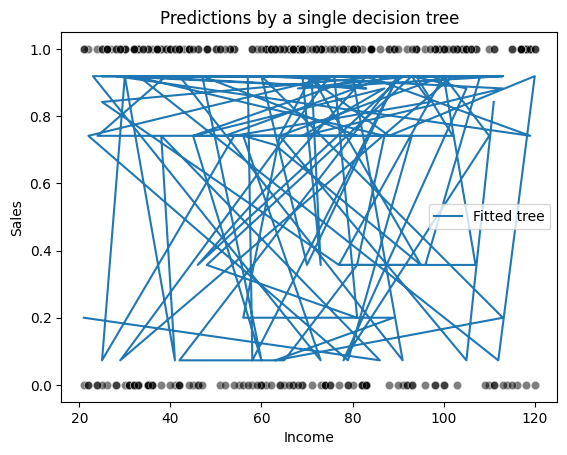

In [61]:
sns.scatterplot(x=x_train['Income'], y=y_train, color="black", alpha=0.5)
plt.plot(x_test['Income'], y_pred, label="Fitted tree")
plt.legend()
_ = plt.title("Predictions by a single decision tree")

In [62]:
# boostrap resampling
import numpy as np
# create a random number generator that will be used to set the randomness
rng = np.random.RandomState(1)
def bootstrap_sample(data, target):
    bootstrap_indices = rng.choice(np.arange(target.shape[0]),size=target.shape[0],replace=True,)
    data_bootstrap = data.iloc[bootstrap_indices]
    target_bootstrap = target.iloc[bootstrap_indices]
    return data_bootstrap, target_bootstrap

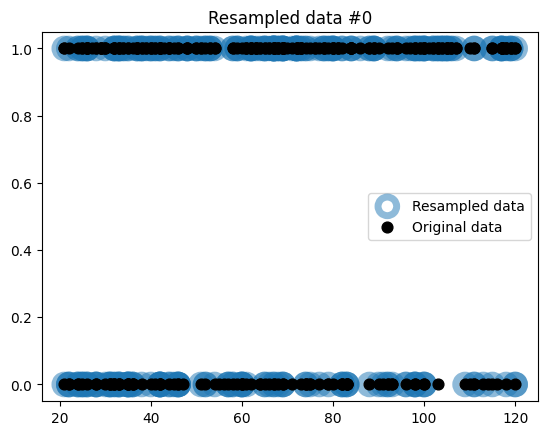

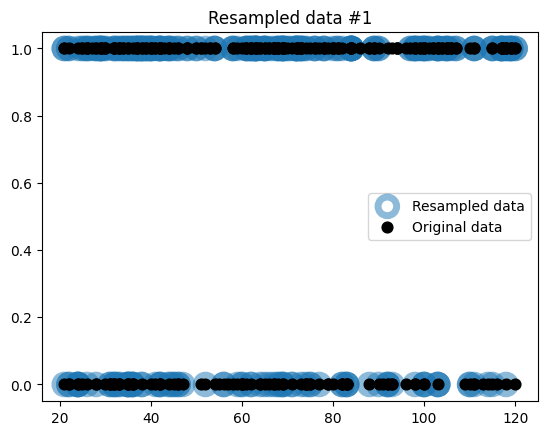

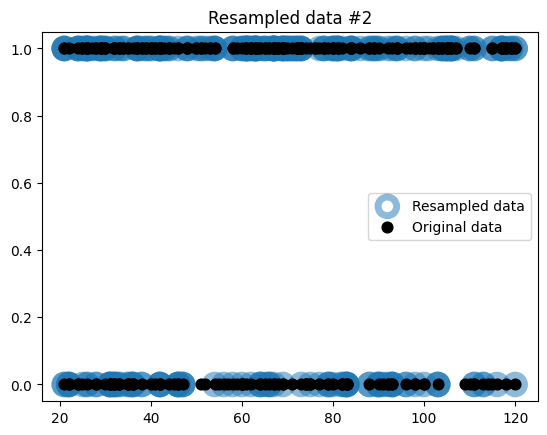

In [63]:
n_bootstraps = 3
for bootstrap_idx in range(n_bootstraps):
    data_bootstrap, target_bootstrap = bootstrap_sample(x_train,y_train,)
    plt.figure()
    plt.scatter(data_bootstrap['Income'],target_bootstrap,color="tab:blue",facecolors="none",alpha=0.5,label="Resampled data",s=180,linewidth=5)
    plt.scatter(x_train['Income'], y_train,color="black",s=60,alpha=1,label="Original data",)
    plt.title(f"Resampled data #{bootstrap_idx}")
    plt.legend()

In [64]:
bag_of_trees = []
for bootstrap_idx in range(n_bootstraps):
    tree = DecisionTreeRegressor(max_depth=3, random_state=0)
    data_bootstrap_sample, target_bootstrap_sample = bootstrap_sample( x_train, y_train)
    tree.fit(data_bootstrap_sample, target_bootstrap_sample)
    bag_of_trees.append(tree)

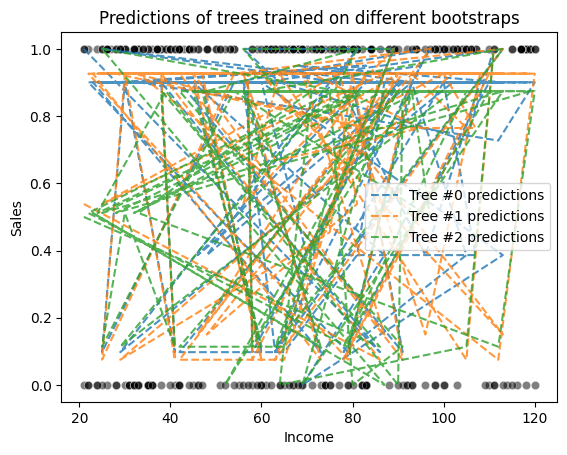

In [65]:
sns.scatterplot(x=x_train['Income'], y=y_train, color="black", alpha=0.5)
for tree_idx, tree in enumerate(bag_of_trees):
    tree_predictions = tree.predict(x_test)
    plt.plot(x_test["Income"],tree_predictions,linestyle="--",alpha=0.8, label=f"Tree #{tree_idx} predictions",)
plt.legend()
_ = plt.title("Predictions of trees trained on different bootstraps")

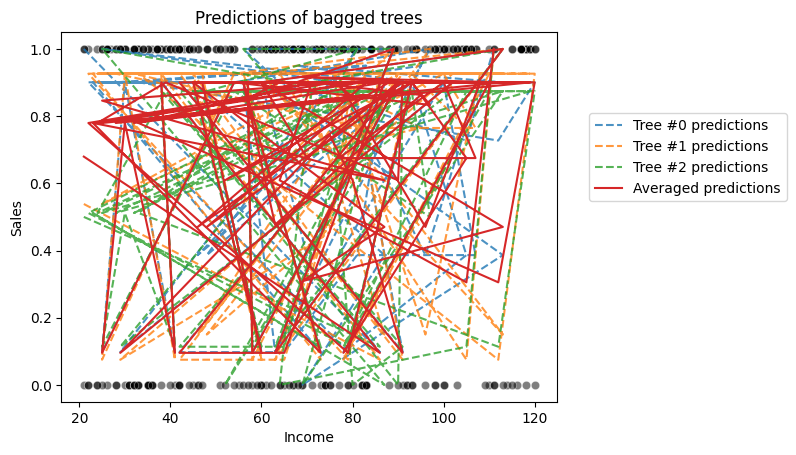

In [66]:
sns.scatterplot( x=x_train['Income'], y=y_train, color="black", alpha=0.5)
bag_predictions = []
for tree_idx, tree in enumerate(bag_of_trees):
    tree_predictions = tree.predict(x_test)
    plt.plot(x_test["Income"], tree_predictions,linestyle="--",alpha=0.8,label=f"Tree #{tree_idx} predictions",)
    bag_predictions.append(tree_predictions)
bag_predictions = np.mean(bag_predictions, axis=0)
plt.plot(x_test["Income"], bag_predictions, label="Averaged predictions",linestyle="-",)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Predictions of bagged trees")

In [67]:
# bagging model
from sklearn.ensemble import BaggingRegressor
bagged_trees = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100,)
_ = bagged_trees.fit(x_train, y_train)

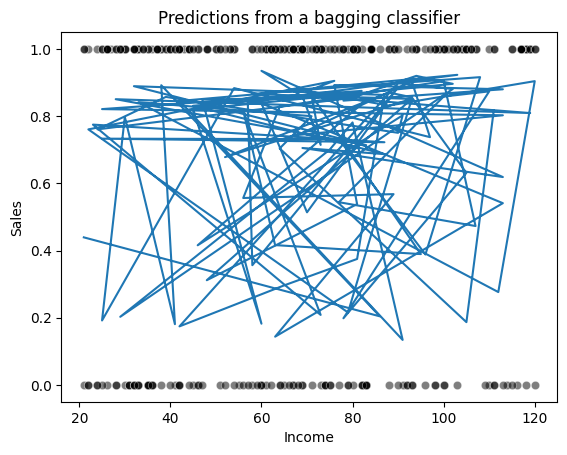

In [68]:
sns.scatterplot(x=x_train['Income'], y=y_train, color="black", alpha=0.5)
bagged_trees_predictions = bagged_trees.predict(x_test)
plt.plot(x_test["Income"], bagged_trees_predictions)
_ = plt.title("Predictions from a bagging classifier")

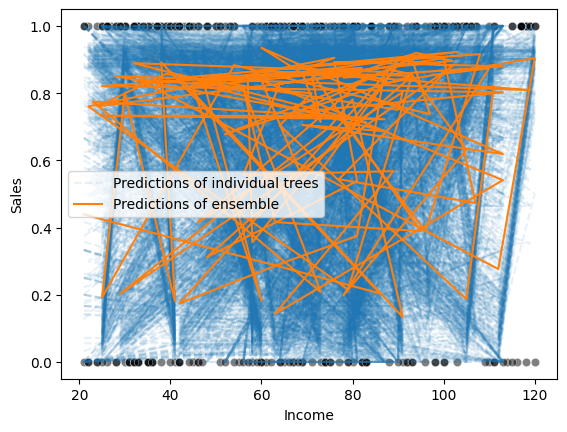

In [69]:
for tree_idx, tree in enumerate(bagged_trees.estimators_):
    label = "Predictions of individual trees" if tree_idx == 0 else None
    tree_predictions = tree.predict(x_test.to_numpy())
    plt.plot(x_test['Income'],tree_predictions,linestyle="--",alpha=0.1,color="tab:blue",label=label,)
sns.scatterplot(x=x_train["Income"], y=y_train, color="black", alpha=0.5)
bagged_trees_predictions = bagged_trees.predict(x_test)
plt.plot(x_test["Income"],bagged_trees_predictions,color="tab:orange",label="Predictions of ensemble",)
_ = plt.legend()